# Sequential Neural Network

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("gas_turbines.csv")
df.head() 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


## EDA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
df.shape

(15039, 11)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

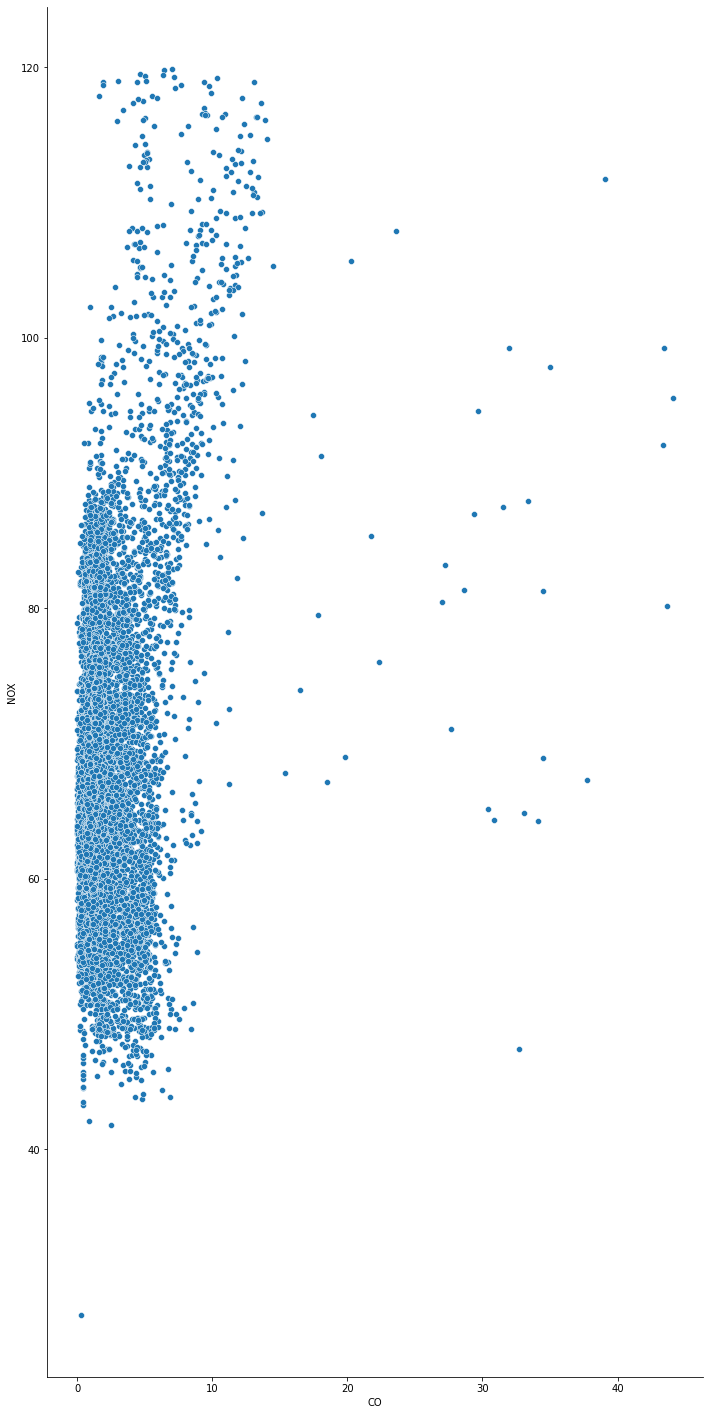

In [7]:
sns.pairplot(data=df,x_vars="CO",y_vars="NOX",height=20,aspect=0.5);

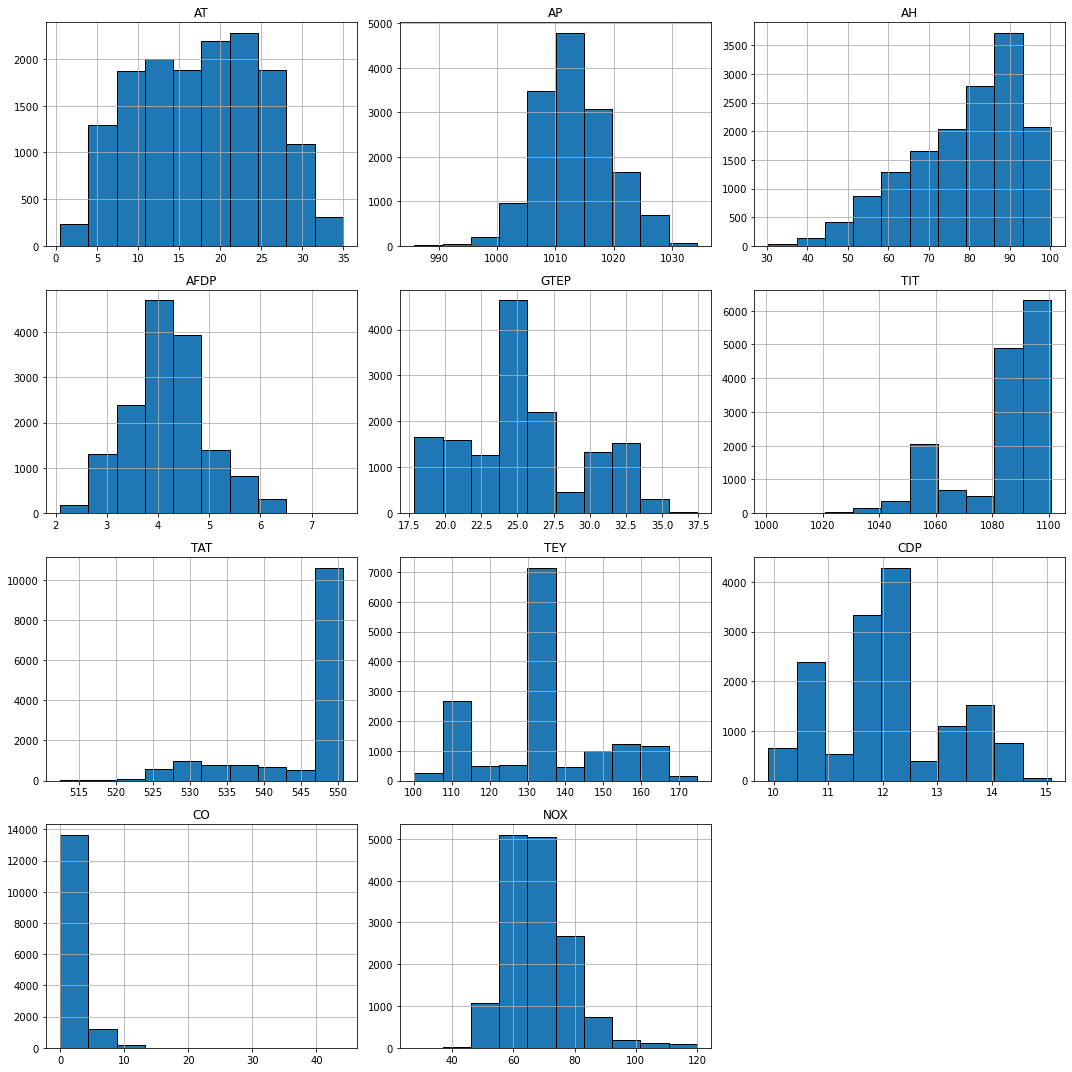

In [8]:
df.hist(edgecolor="k",figsize=(15,15))
plt.tight_layout();

## Separating Independent and Target Variable

In [9]:
x=df.drop("TEY",axis=1)
y=df["TEY"]


## Train Test split

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled_df=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled_df=pd.DataFrame(x_test_scaled,columns=x_test.columns)

## HyperParameter Tuning Activation and LearningRate

In [12]:
from sklearn.model_selection import GridSearchCV,KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import RMSprop

In [13]:
def create_model(activation,learn_rate):
    model=Sequential()
    model.add(Dense(12,input_dim=10,activation=activation))
    model.add(Dropout(0.1))
    model.add(Dense(8,activation=activation))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    rms=RMSprop(learning_rate=learn_rate)
    model.compile(loss="mean_squared_error",optimizer=rms)
    return model

In [14]:
model=KerasRegressor(build_fn=create_model,verbose=0,batch_size=10,epochs=100)

In [15]:

activation=["relu","tanh"]
learn_rate=[0.001,0.01]



In [16]:
param_grid=dict(activation=activation,learn_rate=learn_rate)

In [17]:
kfold=KFold(n_splits=3,shuffle=True,random_state=42)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold,verbose=5)
grid.fit(x_train_scaled_df,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[CV 1/3] END activation=relu, learn_rate=0.001;, score=-5.667 total time=  46.3s
[CV 2/3] END activation=relu, learn_rate=0.001;, score=-2.836 total time=  46.1s
[CV 3/3] END activation=relu, learn_rate=0.001;, score=-7.441 total time=  47.6s
[CV 1/3] END .activation=relu, learn_rate=0.01;, score=-4.406 total time=  47.7s
[CV 2/3] END .activation=relu, learn_rate=0.01;, score=-4.436 total time=  48.7s
[CV 3/3] END .activation=relu, learn_rate=0.01;, score=-2.909 total time=  47.9s
[CV 1/3] END activation=tanh, learn_rate=0.001;, score=-11.289 total time=  48.6s
[CV 2/3] END activation=tanh, learn_rate=0.001;, score=-11.976 total time=  50.5s
[CV 3/3] END activation=tanh, learn_rate=0.001;, score=-10.212 total time=  48.7s
[CV 1/3] END activation=tanh, learn_rate=0.01;, score=-21.915 total time=  49.4s
[CV 2/3] 

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000015EEC0C3408>,
             param_grid={'activation': ['relu', 'tanh'],
                         'learn_rate': [0.001, 0.01]},
             verbose=5)

In [18]:
grid.best_params_

{'activation': 'relu', 'learn_rate': 0.01}

##  NN Model Building

In [19]:
model=Sequential()
model.add(Dense(12,input_dim=10,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(8,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1))
rms=RMSprop(learning_rate=0.01)
model.compile(loss="mean_squared_error",optimizer=rms)

In [20]:
history=model.fit(x_train_scaled_df,y_train,validation_data=(x_test_scaled_df,y_test),epochs=100,batch_size=10)

Train on 10527 samples, validate on 4512 samples
Epoch 1/100
10527/10527 [==============================] - 2s 174us/sample - loss: 1349.9440 - val_loss: 37.7842
Epoch 2/100
10527/10527 [==============================] - 1s 116us/sample - loss: 504.3380 - val_loss: 18.2521
Epoch 3/100
10527/10527 [==============================] - 1s 98us/sample - loss: 435.3690 - val_loss: 11.3592
Epoch 4/100
10527/10527 [==============================] - 1s 97us/sample - loss: 357.7975 - val_loss: 4.5438
Epoch 5/100
10527/10527 [==============================] - 1s 96us/sample - loss: 317.9013 - val_loss: 51.1329
Epoch 6/100
10527/10527 [==============================] - 1s 96us/sample - loss: 281.0733 - val_loss: 5.2390
Epoch 7/100
10527/10527 [==============================] - 1s 96us/sample - loss: 267.4146 - val_loss: 14.1608
Epoch 8/100
10527/10527 [==============================] - 1s 97us/sample - loss: 243.2412 - val_loss: 7.5257
Epoch 9/100
10527/10527 [==============================] - 1s 9

10527/10527 [==============================] - 1s 96us/sample - loss: 26.2962 - val_loss: 4.9901
Epoch 75/100
10527/10527 [==============================] - 1s 97us/sample - loss: 25.4126 - val_loss: 5.5835
Epoch 76/100
10527/10527 [==============================] - 1s 117us/sample - loss: 27.1085 - val_loss: 4.1857
Epoch 77/100
10527/10527 [==============================] - 1s 119us/sample - loss: 26.2012 - val_loss: 4.3997
Epoch 78/100
10527/10527 [==============================] - 1s 94us/sample - loss: 27.3831 - val_loss: 4.3903
Epoch 79/100
10527/10527 [==============================] - 1s 97us/sample - loss: 25.5734 - val_loss: 5.5025
Epoch 80/100
10527/10527 [==============================] - 1s 96us/sample - loss: 25.9571 - val_loss: 7.8448
Epoch 81/100
10527/10527 [==============================] - 1s 100us/sample - loss: 25.7140 - val_loss: 4.2134
Epoch 82/100
10527/10527 [==============================] - 1s 98us/sample - loss: 25.9069 - val_loss: 5.1512
Epoch 83/100
10527/1

In [21]:
scores=model.evaluate(x_test_scaled_df,y_test)
scores

4512/4512 [==============================] - 0s 16us/sample - loss: 8.1650


8.165028751319182

In [22]:
history_df=pd.DataFrame(history.history)
history_df.head()

,loss,val_loss
0,1349.943984,37.784234
1,504.338039,18.252116
2,435.368957,11.359232
3,357.797530,4.543794
4,317.901308,51.132869


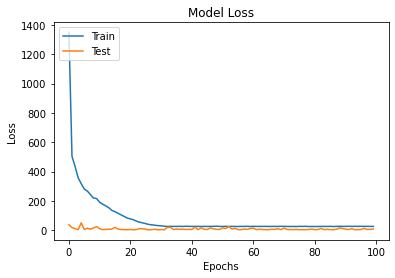

In [23]:
plt.plot(history_df["loss"])
plt.plot(history_df["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Train","Test"],loc="upper left");

In [24]:
predictions=model.predict(x)
np.round(predictions[:20],0)

array([[7296.],
       [7297.],
       [7298.],
       [7299.],
       [7299.],
       [7299.],
       [7301.],
       [7299.],
       [7301.],
       [7512.],
       [7533.],
       [7531.],
       [7538.],
       [7538.],
       [7538.],
       [7538.],
       [7540.],
       [7541.],
       [7536.],
       [7533.]], dtype=float32)